<a href="https://colab.research.google.com/github/shawngonsalves/PneumoniaDetection-Deployment/blob/master/Copy_of_Final_Summer_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




# Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import matplotlib.image as mpimg

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'shawngonsalves'
os.environ['KAGGLE_KEY'] = '5cb92d69670ca012562c63050667b2b3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

# Description of the Pneumonia Dataset
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

The link for downloading the dataset is https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [ ]:
train = get_training_data('/content/chest_xray/train')
test = get_training_data('/content/chest_xray/test')
val = get_training_data('/content/chest_xray/val')

In [ ]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'
validation_dir = '/content/chest_xray/val'

In [ ]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [ ]:
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )

Checking for total number of images in each sub-directory

In [ ]:
print('total training normal images :', len(os.listdir(      train_normal_dir ) ))
print('total training pneumonia images :', len(os.listdir(      train_pneumonia_dir ) ))

print('total test normal images :', len(os.listdir(      test_normal_dir ) ))
print('total test pneumonia images :', len(os.listdir(      test_pneumonia_dir ) ))

print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation pneumonia images :', len(os.listdir( validation_pneumonia_dir ) ))


total training normal images : 1341
total training pneumonia images : 3875
total test normal images : 234
total test pneumonia images : 390
total validation normal images : 8
total validation pneumonia images : 8


In [ ]:
total_train  = len(os.listdir(      train_normal_dir ) ) + len(os.listdir(      train_pneumonia_dir ) )
print('Total training images are:', total_train)
total_test  = len(os.listdir(      test_normal_dir ) ) + len(os.listdir(      test_pneumonia_dir ) )
print('Total test images are:', total_test)

Total training images are: 5216
Total test images are: 624


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 5216 images belonging to 2 classes.


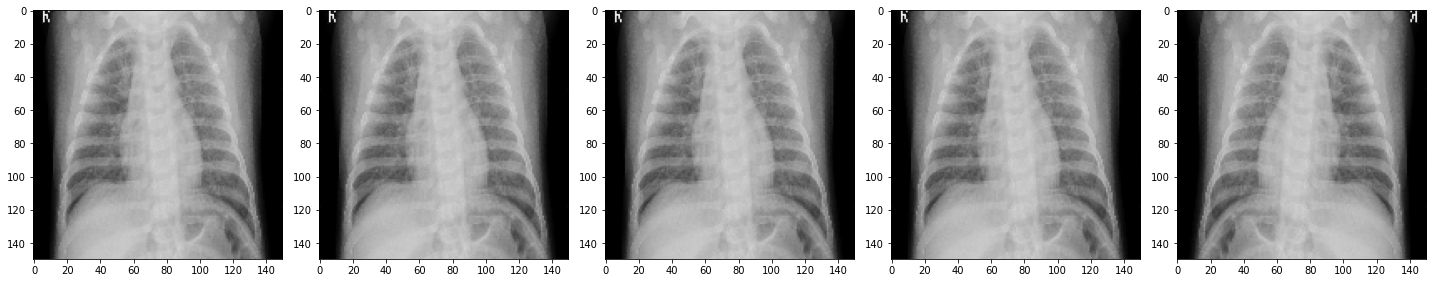

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(15)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 5216 images belonging to 2 classes.


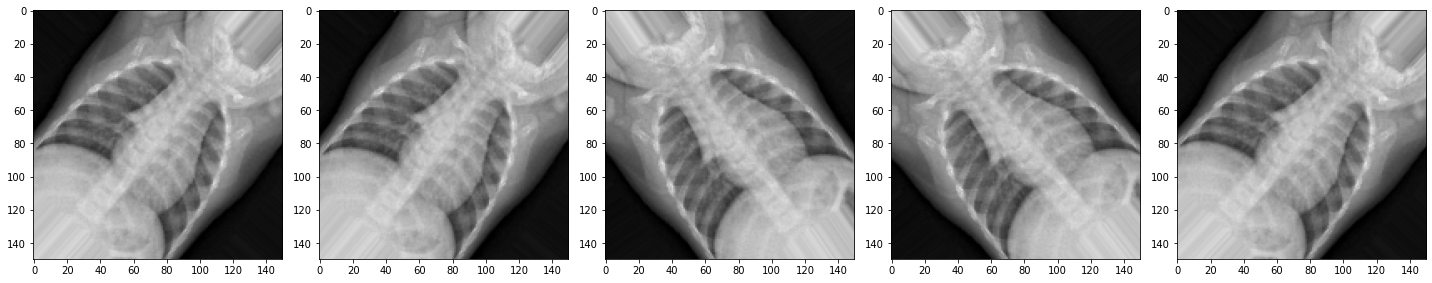

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 5216 images belonging to 2 classes.


In [ ]:

print(train_data_gen.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


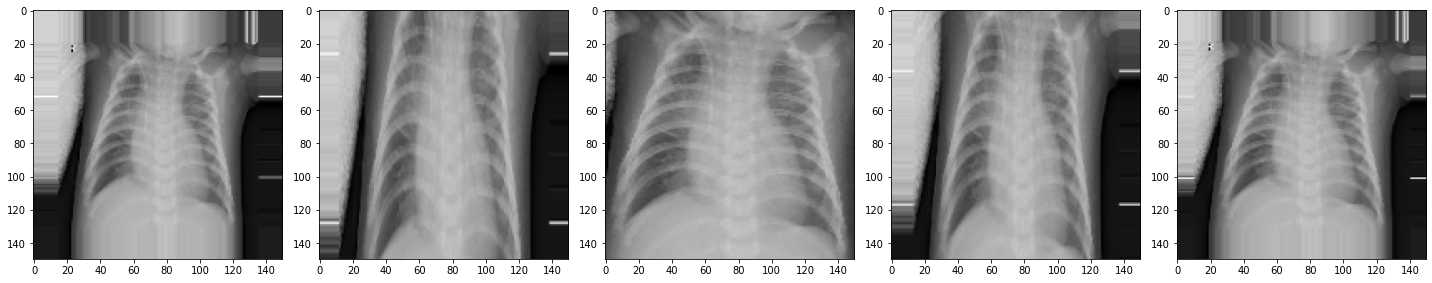

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


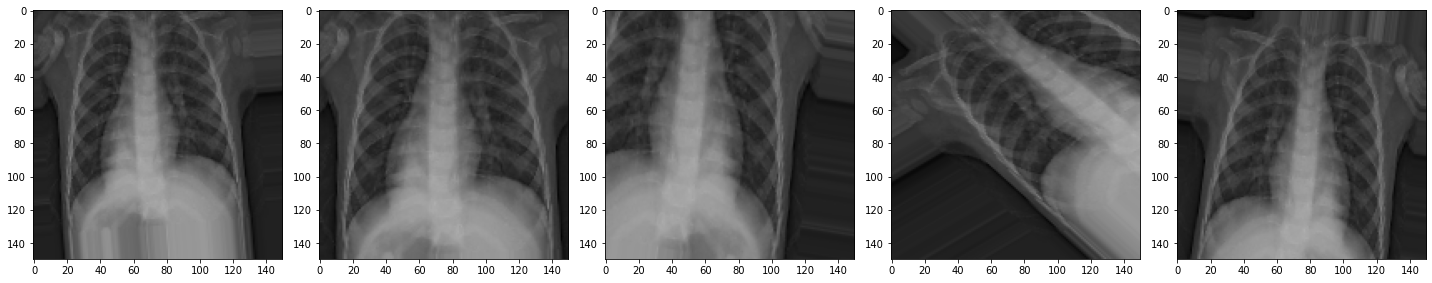

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:


epochs= 60
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)), 
                           
   )
)

Epoch 1/60
53/53 [==============================] - 75s 1s/step - loss: 0.5756 - accuracy: 0.7381 - val_loss: 0.5532 - val_accuracy: 0.6298
Epoch 2/60
53/53 [==============================] - 74s 1s/step - loss: 0.5132 - accuracy: 0.7860 - val_loss: 0.5797 - val_accuracy: 0.6378
Epoch 3/60
53/53 [==============================] - 74s 1s/step - loss: 0.4195 - accuracy: 0.7962 - val_loss: 0.6222 - val_accuracy: 0.6827
Epoch 4/60
53/53 [==============================] - 74s 1s/step - loss: 0.3138 - accuracy: 0.8560 - val_loss: 0.7757 - val_accuracy: 0.6314
Epoch 5/60
53/53 [==============================] - 74s 1s/step - loss: 0.3234 - accuracy: 0.8491 - val_loss: 0.3675 - val_accuracy: 0.8526
Epoch 6/60
53/53 [==============================] - 74s 1s/step - loss: 0.2587 - accuracy: 0.8831 - val_loss: 0.4579 - val_accuracy: 0.7436
Epoch 7/60
53/53 [==============================] - 74s 1s/step - loss: 0.2710 - accuracy: 0.8823 - val_loss: 0.4632 - val_accuracy: 0.7885
Epoch 8/60
53/53 [==

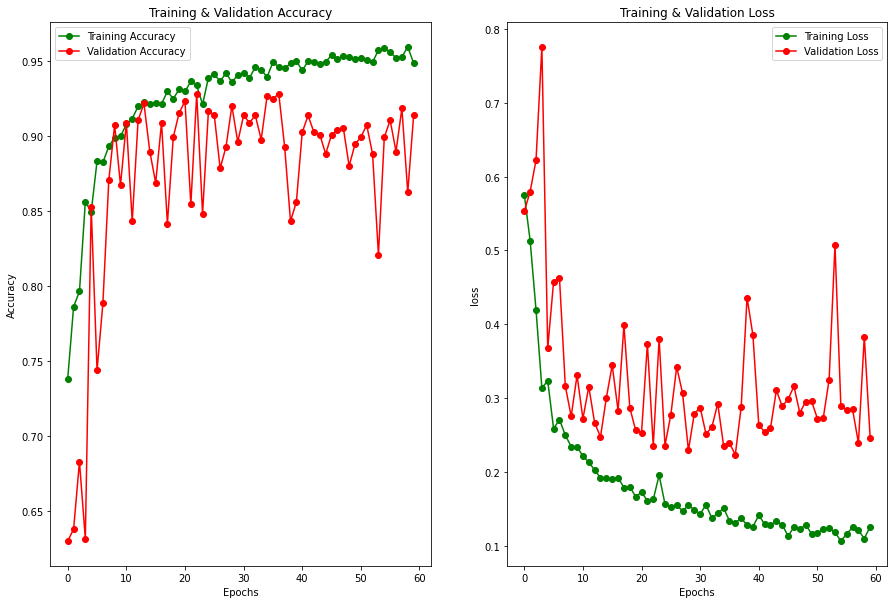

In [ ]:
epochs = [i for i in range(60)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(15,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
import time
saved_model_path = "/content/drive/My Drive/temp_TFJS/SHAWNG{}".format(int(time.time()))
model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/temp_TFJS/SHAWNG1597044583/assets


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
reloaded = tf.keras.models.load_model(
    '/content/drive/My Drive/temp_TFJS/SHAWNG1597022667',
    custom_objects={'KerasLayer': hub.KerasLayer})
reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# organic image
from google.colab import files
from keras_preprocessing import image

path = '/content/drive/My Drive/google_images/WhatsApp Image 2020-08-13 at 12.31.07 AM.jpeg'
test_image = image.load_img(path,
                            target_size = (64, 64))

(1, 150, 150, 3)

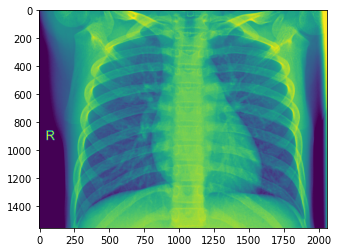

[[  19.277592 1085.7233  ]]


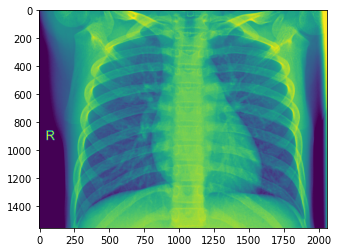

Predicted X-ray type:  [[  19.277592 1085.7233  ]]


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imge = mpimg.imread(path)
imgplot = plt.imshow(imge)
plt.show()
print('Predicted waste type: ', prediction)

In [ ]:
result  = model.evaluate_generator(test_data_gen, steps=len(test_data_gen), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

7/7 [==============================] - 4s 590ms/step - loss: 0.2461 - accuracy: 0.9135
Loss: 0.24607081711292267
Accuracy: 0.9134615659713745


In [ ]:
result  = model.evaluate_generator(val_data_gen,steps=len(val_data_gen), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.7500
Loss: 0.35158753395080566
Accuracy: 0.75


We test out the model with the Normal sub dir of validation dataset.

Saving NORMAL2-IM-1430-0001.jpeg to NORMAL2-IM-1430-0001.jpeg


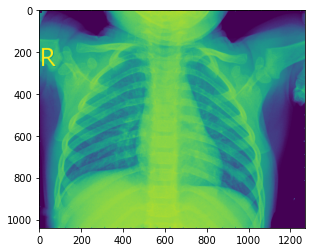

1.2771008
 Result: NORMAL


In [ ]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/val/NORMAL/' + fn
  img = image.load_img(path,target_size=(150,150))
  


  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()


  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])
  
  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print(' Result: NORMAL')
else:
    print(' Result: PNEUMONIA')

Saving person78_bacteria_378.jpeg to person78_bacteria_378.jpeg


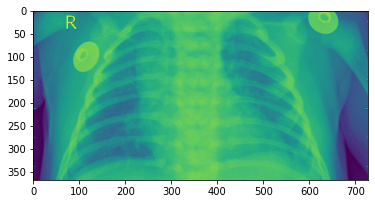

-8.151694
Result: PNEUMONIA


In [ ]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/test/PNEUMONIA/' + fn
  img = image.load_img(path,target_size=(150,150))
  
  

  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

Val pneumonia

Saving person1946_bacteria_4874.jpeg to person1946_bacteria_4874.jpeg


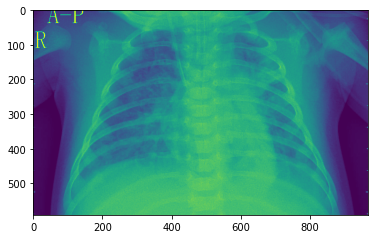

-9.081815
Result: PNEUMONIA


In [ ]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/val/PNEUMONIA/' + fn
  img = image.load_img(path,target_size=(150,150))


  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

Saving NORMAL2-IM-0045-0001.jpeg to NORMAL2-IM-0045-0001.jpeg


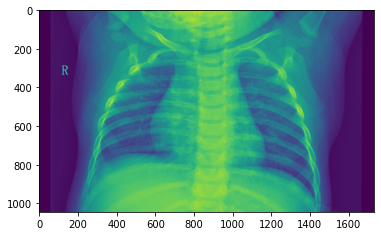

1.8524722
Result: NORMAL


In [ ]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/test/NORMAL/' + fn
  img = image.load_img(path,target_size=(150,150))

  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/drive/My Drive/temp_TFJS/ResearchModel/')

     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 137.3MB 106kB/s 
     |████████████████████████████████| 256kB 51.4MB/s 
     |████████████████████████████████| 921kB 55.3MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=89320a984211bbc7baf288355b2fb60db493523a7ea0a0536b054808a02c8619
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
